In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/kraken_cleaned.csv')
df.head(10)

,Timestamp unix,Timestamp,open,high,low,close,Volume (BTC),Volume (Currency),Weighted_Price
0,43901.00000,11/03/2020 0:00,7889.6,7889.6,7886.6,7886.6,0.09,675.70,7888.58
1,43901.00069,11/03/2020 0:01,7884.8,7884.8,7870.0,7870.0,36.95,290927.80,7873.70
2,43901.00139,11/03/2020 0:02,7870.3,7872.0,7865.0,7870.7,3.33,26182.39,7869.54
3,43901.00208,11/03/2020 0:03,7875.0,7875.1,7874.2,7875.1,1.90,14924.35,7874.81
4,43901.00278,11/03/2020 0:04,7876.1,7882.4,7876.1,7882.4,2.64,20768.79,7879.93
5,43901.00347,11/03/2020 0:05,7887.2,7899.5,7886.5,7899.5,3.88,30609.61,7892.74
6,43901.00417,11/03/2020 0:06,7898.2,7898.2,7896.1,7896.8,1.18,9314.75,7896.85
7,43901.00486,11/03/2020 0:07,7897.0,7904.9,7897.0,7904.9,0.15,1200.79,7901.67
8,43901.00556,11/03/2020 0:08,7904.9,7909.1,7904.4,7908.0,20.78,164332.90,7906.84
9,43901.00625,11/03/2020 0:09,7905.1,7906.9,7901.1,7906.9,11.16,88228.65,7904.47


In [3]:
import matplotlib.pyplot as plt
plt.plot(df.head(10).index, df.head(10)['Weighted_Price'])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
df.head(10).Weighted_Price.values - np.mean(df.head(10).Weighted_Price.values)

array([ -0.333, -15.213, -19.373, -14.103,  -8.983,   3.827,   7.937,
        12.757,  17.927,  15.557])

In [5]:
slope = np.gradient(df.head(10).Weighted_Price)
slope

array([-14.88 ,  -9.52 ,   0.555,   5.195,   8.965,   8.46 ,   4.465,
         4.995,   1.4  ,  -2.37 ])

In [6]:
slope2 = np.gradient(slope)
slope2

array([ 5.36  ,  7.7175,  7.3575,  4.205 ,  1.6325, -2.25  , -1.7325,
       -1.5325, -3.6825, -3.77  ])

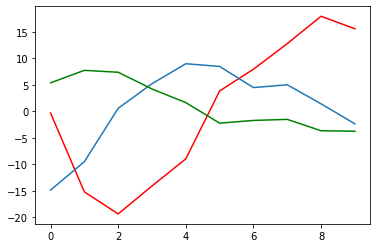

In [7]:
plt.plot(df.head(10)['Weighted_Price'] - np.mean(df.head(10).Weighted_Price), c='red')
plt.plot(slope)
plt.plot(slope2, c='green')
plt.show()

In [8]:
y = np.array([1, 2, 4, 7, 11, 16], dtype=np.float)
print(np.gradient(y))
print(np.gradient(y,2))

[1.  1.5 2.5 3.5 4.5 5. ]
[0.5  0.75 1.25 1.75 2.25 2.5 ]


In [9]:
def gradient_edwin(y1,y2):
    return (y2-y1)/60

[-0.24800000000000183, -0.0693333333333309, 0.0878333333333406, 0.08533333333333151, 0.2134999999999915, 0.0685000000000097, 0.08033333333332848, 0.08616666666666788, -0.03949999999999818]


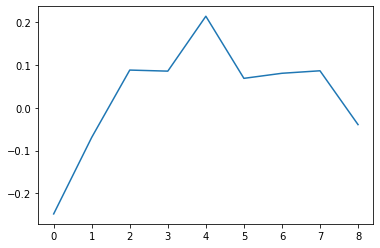

In [10]:
grads = []
y1 = df.head(10).Weighted_Price.values[0]
for y2 in df.head(10).Weighted_Price.values[1:]:
    grads.append(gradient_edwin(y1,y2))
    y1 = y2
print(grads)
#plt.plot(df.head(10)['Weighted_Price'] - np.mean(df.head(10).Weighted_Price), c='red')
plt.plot(grads)
plt.show()

[7888.58 7873.7  7869.54 7874.81 7879.93 7892.74 7896.85 7901.67 7906.84
 7904.47]


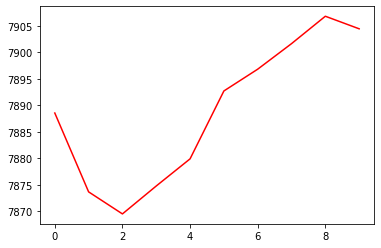

In [14]:
print(df.head(10).Weighted_Price.values)
plt.plot(df.head(10)['Weighted_Price'], c='red')

In [17]:
data = df.head(10).Weighted_Price
last_g = 0
last_p = data[0]
for d in data[1:]:
    grad = (d-last_p)/60
    second_grad = (grad-last_g)/60
    print("second_grad ", second_grad*100)
    last_g = grad
    last_p = d

second_grad  -0.4133333333333364
second_grad  0.29777777777778486
second_grad  0.26194444444445253
second_grad  -0.00416666666668182
second_grad  0.21361111111109998
second_grad  -0.24166666666663636
second_grad  0.01972222222219796
second_grad  0.009722222222232324
second_grad  -0.20944444444444343


In [85]:
t_s = df.Weighted_Price.values[1800:2500]
arrs = []
j = 10
for i in range(0,len(t_s), j): 
    arrs.append(t_s[i:i+j])

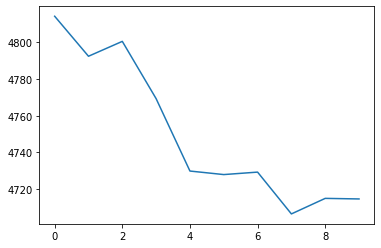

In [92]:
t = [4814.07, 4792.32, 4800.41, 4769.26, 4729.91, 4727.99, 4729.33, 4706.6, 4715.05, 4714.74]
plt.plot(t)

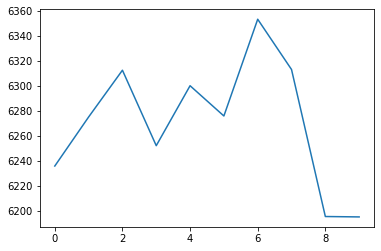

In [94]:
t = [6235.81, 6275.05, 6312.5, 6252.11, 6300.09, 6275.87, 6353.3, 6313.07, 6195.4, 6195.08]
plt.plot(t)

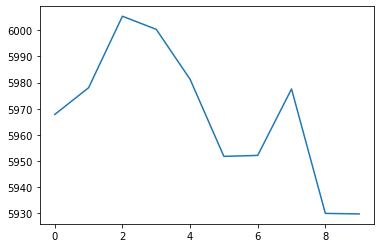

In [95]:
t =  [5967.79, 5978.02, 6005.38, 6000.37, 5981.26, 5951.74, 5952.1, 5977.54, 5929.91, 5929.71]
plt.plot(t)

In [93]:
avgs = []
for t in arrs:
    grads = []
    for i in range(1,len(t)):
        grads.append(t[i] - t[i-1])
    #print(np.mean(grads))
    avgs.append(np.mean(grads))
    
print(avgs)
print(np.mean(avgs))

[-2.1911111111110384, -3.623333333333297, -5.233333333333373, -2.9588888888888, -1.9955555555555595, 2.5744444444444525, -5.216666666666646, -2.2177777777777816, 1.873333333333398, -0.7166666666666465, -4.398888888888905, -0.0044444444444404025, -4.958888888888901, 5.073333333333317, 4.896666666666736, -0.9733333333333576, -2.275555555555608, -1.4766666666666626, 1.869999999999992, -3.373333333333398, 2.5777777777777575, -1.94555555555558, 1.0044444444444405, 0.29555555555553936, -1.1977777777777494, -9.762222222222185, -1.9133333333333615, -56.453333333333326, -90.24777777777783, 5.436666666666598, 33.2944444444444, 2.709999999999935, -23.982222222222237, -8.828888888888892, -20.92999999999999, 14.552222222222149, -0.5655555555555717, 20.253333333333305, -17.73888888888895, -9.038888888888827, -11.546666666666674, 2.5766666666666223, -3.7622222222222867, 6.615555555555551, -0.3844444444444485, -9.456666666666731, 3.4755555555555273, 11.744444444444424, -6.002222222222169, 8.9433333333

In [83]:
df

,Timestamp unix,Timestamp,open,high,low,close,Volume (BTC),Volume (Currency),Weighted_Price
0,43901.00000,11/03/2020 0:00,7889.6,7889.6,7886.6,7886.6,0.09,675.70,7888.58
1,43901.00069,11/03/2020 0:01,7884.8,7884.8,7870.0,7870.0,36.95,290927.80,7873.70
2,43901.00139,11/03/2020 0:02,7870.3,7872.0,7865.0,7870.7,3.33,26182.39,7869.54
3,43901.00208,11/03/2020 0:03,7875.0,7875.1,7874.2,7875.1,1.90,14924.35,7874.81
4,43901.00278,11/03/2020 0:04,7876.1,7882.4,7876.1,7882.4,2.64,20768.79,7879.93
...,...,...,...,...,...,...,...,...,...
8636,43906.99722,16/03/2020 23:56,5018.6,5028.5,5017.4,5028.2,0.27,1353.55,5026.01
8637,43906.99792,16/03/2020 23:57,5028.7,5042.9,5028.7,5033.1,22.28,112191.66,5036.61
8638,43906.99861,16/03/2020 23:58,5036.7,5036.9,5030.0,5030.0,1.58,7929.06,5032.63
8639,43906.99931,16/03/2020 23:59,5030.0,5042.3,5030.0,5042.3,3.49,17571.34,5032.51


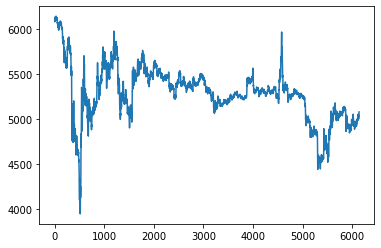

In [88]:
plt.plot(df[2500:].Weighted_Price.values)